In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
data = pd.read_csv("datasets/cars.csv")
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
data.shape

(261, 8)

In [5]:
data = data.sample(frac=1)

In [6]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
241,18.0,6,225,105,3121,17,1974,US.
30,27.0,4,97,88,2130,15,1971,Japan.
213,30.0,4,79,70,2074,20,1972,Europe.
90,34.1,4,86,65,1975,15,1980,Japan.
11,34.3,4,97,78,2188,16,1981,Europe.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 241 to 245
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 26.5+ KB


In [8]:
data.columns = data.columns.str.lstrip()


In [9]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 241 to 245
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 26.5+ KB


In [11]:
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors='coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(256, 8)

In [14]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

In [15]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
241,18.0,6,225.0,105,3121.0,17,1974,2
30,27.0,4,97.0,88,2130.0,15,1971,1
213,30.0,4,79.0,70,2074.0,20,1972,0
90,34.1,4,86.0,65,1975.0,15,1980,1
11,34.3,4,97.0,78,2188.0,16,1981,0


In [16]:
data_x = pd.DataFrame(data, columns=['mpq', 'cubicinches', 'cylinders', 'hp'])
label_y = data['brand']

Text(0, 0.5, 'Weight')

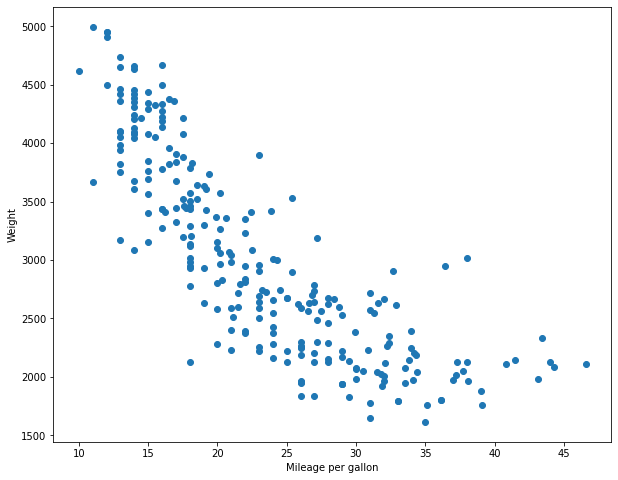

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(data['mpg'], data['weightlbs'])
plt.xlabel("Mileage per gallon")
plt.ylabel("Weight")

In [18]:
from sklearn.cluster import KMeans


In [20]:
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(data_x)
    sum_of_squared_distances.append(k_means.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').